# Plot the statistics of the desired execution

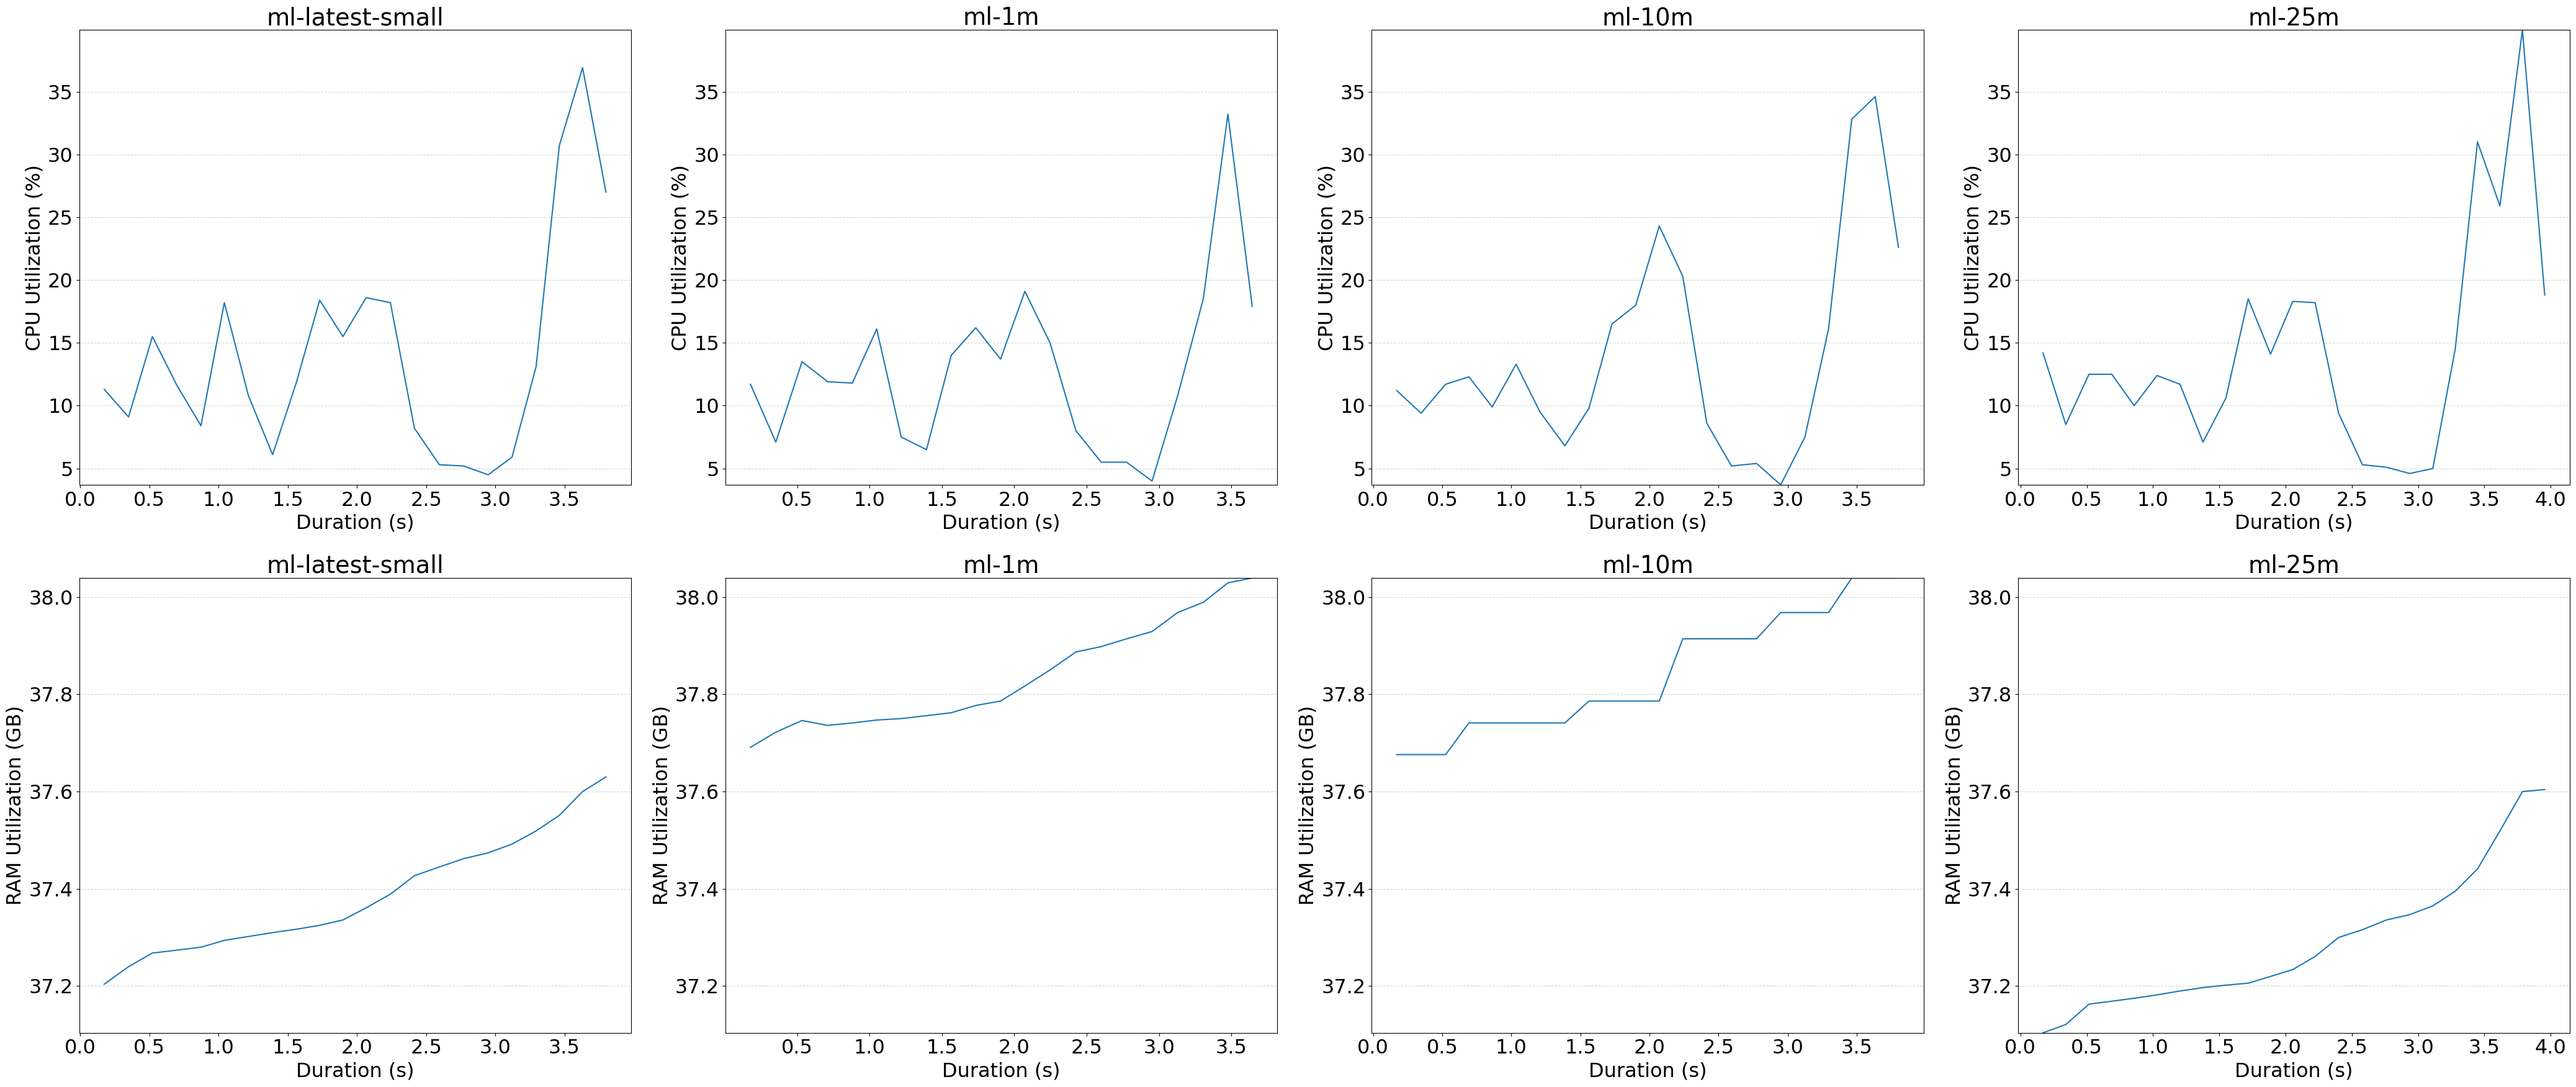

In [8]:
import matplotlib.pyplot as plt
from datetime import datetime, time
import os

plt.rcParams.update({'font.size': 23})
# csv_file = '/home/student/Projects/bg/stats/ml-25m/03_train_ALS_model.csv'  # Replace with the path to your CSV file

datasets = os.listdir('stats')

# set the code phase to plot uncommenting the desired one
plot_type = "00_load_movies"
# plot_type = "01_load_ratings"
# plot_type = "02_prepare_ALS_matrix"
# plot_type = "03_train_ALS_model"
# plot_type = "04_eval_ALS_model"

fig, axs = plt.subplots(2, 4, figsize=(42, 18))  # Creating a 2x2 grid of subplots

for j in range(2):
    global_min = float('inf')
    global_max = float('-inf')
    
    for i, dataset in enumerate(datasets):
        x_values = []
        y_values = []

        csv_file = os.path.join('stats', dataset, plot_type + ".csv")
        with open(csv_file, 'r') as file:
            start_time_ = file.readline().strip().split(';')[0]
            start_time = datetime.combine(datetime.today(), datetime.strptime(start_time_, '%H:%M:%S:%f').time())
            for line in file:
                fields = line.strip().split(';')
                time_difference = datetime.combine(datetime.today(), datetime.strptime(fields[0], '%H:%M:%S:%f').time()) - start_time
                x_values.append(time_difference.total_seconds())  # Assuming x-values are in the first column
                if j == 0:
                    y_values.append(float(fields[1].replace(',', '.')))  # Convert and append y-values
                else:
                    y_values.append(float(fields[2]) / 1000)  # Convert and append y-values


        # subplot_row = i // 2  # Row index of the subplot
        # subplot_col = i % 2  # Column index of the subplot
        axs[j][i].plot(x_values, y_values)
        axs[j][i].set_xlabel('Duration (s)')
        y_label = 'CPU Utilization (%)' if j == 0 else 'RAM Utilization (GB)'
        axs[j][i].set_ylabel(y_label)
        axs[j][i].set_title(dataset)
        axs[j][i].grid(axis='y', linestyle='--', alpha=0.5)

        # Update the global minimum and maximum
        local_min = min(y_values)
        local_max = max(y_values)
        global_min = min(global_min, local_min)
        global_max = max(global_max, local_max)

    # Set the y-axis limits for all subplots
    for ax in axs[j]:
        ax.set_ylim(global_min, global_max)

plt.tight_layout()
plt.show()